# 📌 Regularization: Ridge, Lasso, dan Elastic Net  
_(Ringkasan Konseptual & Matematis)_

---

## 1. Linear Regression (Tanpa Regularization)

### Model
$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + \dots + w_px_p
$$

### Loss Function (Ordinary Least Squares)
$$
\mathcal{L}_{OLS}(w)
= \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

### Masalah
- Koefisien bisa sangat besar  
- Mudah overfitting  
- Sensitif terhadap noise dan multikolinearitas  

---

## 2. Ridge Regression (L2 Regularization)

### Rumus
$$
\mathcal{L}_{Ridge}(w)
= \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
+ \alpha \sum_{j=1}^{p} w_j^2
$$

### Intuisi
- Menambahkan hukuman untuk koefisien besar  
- Semua fitur tetap digunakan  
- Koefisien dikecilkan, **jarang menjadi nol**

### Karakteristik
- Model **stabil**  
- Tidak melakukan seleksi fitur  
- Cocok jika banyak fitur berkontribusi kecil  

---

## 3. Lasso Regression (L1 Regularization)

### Rumus
$$
\mathcal{L}_{Lasso}(w)
= \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
+ \alpha \sum_{j=1}^{p} |w_j|
$$

### Intuisi
- Hukuman linear terhadap koefisien  
- Mudah mendorong koefisien menjadi **nol**

### Karakteristik
- Melakukan **seleksi fitur otomatis**  
- Menghasilkan model **sparse (jarang)**  
- Mudah diinterpretasikan  
- Bisa tidak stabil jika fitur saling berkorelasi tinggi  

---

## 4. Elastic Net (Gabungan L1 dan L2)

### Rumus
$$
\mathcal{L}_{Elastic}(w)
= \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
+ \alpha \left[
l1\_ratio \sum_{j=1}^{p} |w_j|
+ \frac{(1 - l1\_ratio)}{2} \sum_{j=1}^{p} w_j^2
\right]
$$

### Hyperparameter
- **alpha**  
  Mengontrol kekuatan regularisasi (semakin besar → model makin sederhana)

- **l1_ratio**
  - `0`   → Ridge murni  
  - `1`   → Lasso murni  
  - `0 < l1_ratio < 1` → Campuran Ridge & Lasso  

### Karakteristik
- Melakukan seleksi fitur (seperti Lasso)  
- Lebih stabil (seperti Ridge)  
- Cocok saat tidak yakin memilih Ridge atau Lasso  
- Baik untuk fitur yang saling berkorelasi  

---

## 5. Perbandingan Singkat

| Model        | Penalti | Seleksi Fitur | Stabilitas |
|-------------|---------|---------------|------------|
| Linear      | Tidak ada | ❌ | ❌ |
| Ridge (L2)  | Σ w²     | ❌ | ✅ |
| Lasso (L1)  | Σ |w|    | ✅ | ❌ |
| Elastic Net | L1 + L2  | ✅ | ✅ |

---

## 6. Intuisi Besar (Key Takeaways)

- Banyak fitur **bukan masalah**
- Masalah utama adalah **fitur tidak terkontrol**
- Regularization membantu:
  - Mengurangi overfitting  
  - Mengontrol kompleksitas model  
  - Menyeimbangkan bias–variance  

> **Regularization = menambahkan preferensi ke dalam matematika model**  
> bukan hanya *fit data*, tetapi *fit data dengan cara yang aman*.


# Ridge Regression tanpa Pipeline

Pada latihan ini kita mengulang contoh Ridge Regression di lesson_02, tetapi menulis semua langkah secara eksplisit tanpa `Pipeline`. Ini membantu memahami transformasi apa saja yang terjadi di balik layar.

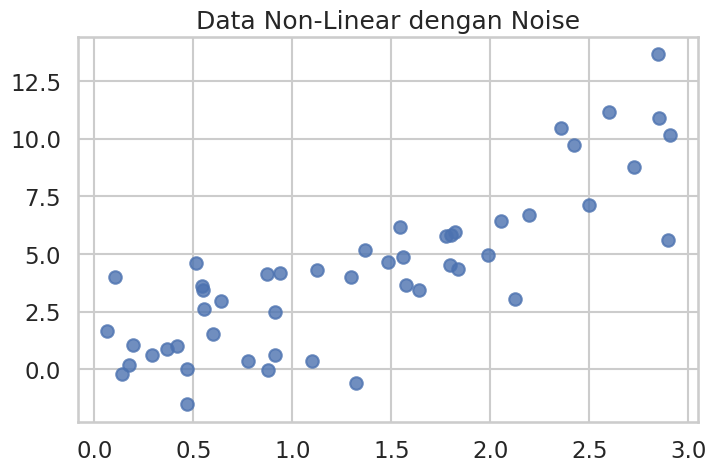

In [2]:
# Setup: data dan import tanpa Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

np.set_printoptions(precision=2, floatmode='fixed', suppress=True)
sns.set_theme(style="whitegrid", context="talk")

# Data non-linear sederhana
np.random.seed(42)
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + 2 * np.random.randn(m, 1)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.8)
plt.title("Data Non-Linear dengan Noise")
plt.show()

### Langkah 1: Bangun fitur polinomial dan skala manual tanpa Pipeline

Kita akan membuat fitur polinomial derajat 10, melakukan scaling, lalu melatih Regresi Linear biasa (tanpa regularisasi) untuk melihat overfitting.

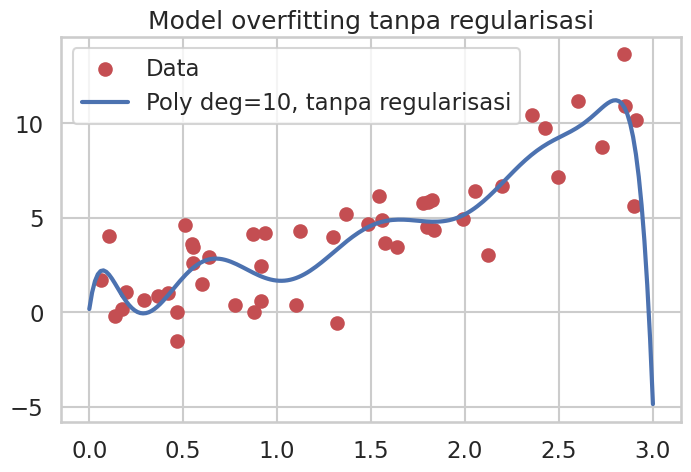

Koefisien LinearRegression:
[[      59.52    -1998.78    23841.95  -143312.98   497819.57 -1060724.93
   1408865.41 -1138160.75   512026.29   -98412.70]]


In [3]:
# Transformasi manual + LinearRegression (tanpa regularisasi)
poly = PolynomialFeatures(degree=10, include_bias=False)
std_scaler = StandardScaler()

X_poly = poly.fit_transform(X)
X_poly_scaled = std_scaler.fit_transform(X_poly)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_scaled, y)

# Siapkan grid untuk plot
X_new = np.linspace(0, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly_scaled = std_scaler.transform(X_new_poly)
y_pred_lin = lin_reg.predict(X_new_poly_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="r", label="Data")
plt.plot(X_new, y_pred_lin, label="Poly deg=10, tanpa regularisasi", linewidth=3)
plt.title("Model overfitting tanpa regularisasi")
plt.legend()
plt.show()

print("Koefisien LinearRegression:")
print(lin_reg.coef_)

### Langkah 2: Terapkan Ridge Regression manual (tetap tanpa Pipeline)

Kita memakai transformasi yang sama, lalu melatih `Ridge` dengan `alpha=1` untuk melihat efek regularisasi.

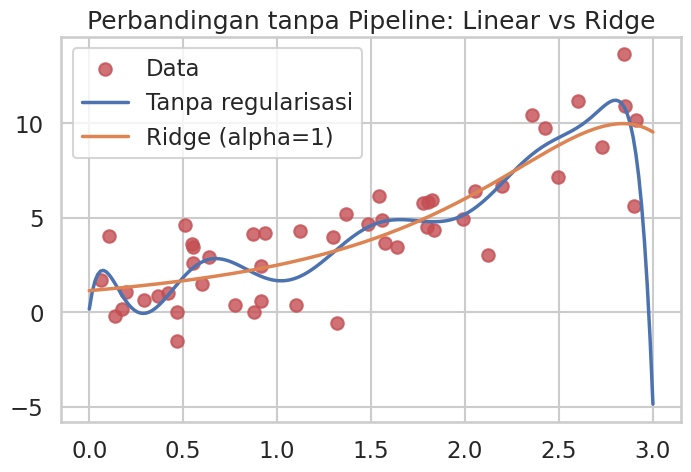

Koefisien LinearRegression:
[[      59.52    -1998.78    23841.95  -143312.98   497819.57 -1060724.93
   1408865.41 -1138160.75   512026.29   -98412.70]]

Koefisien Ridge (alpha=1):
[ 0.73  0.89  0.85  0.74  0.58  0.36  0.11 -0.18 -0.49 -0.81]


In [4]:
# Fit Ridge di atas fitur yang sama
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_poly_scaled, y)
y_pred_ridge = ridge_reg.predict(X_new_poly_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="r", alpha=0.8, label="Data")
plt.plot(X_new, y_pred_lin, label="Tanpa regularisasi", linewidth=2.5)
plt.plot(X_new, y_pred_ridge, label="Ridge (alpha=1)", linewidth=2.5)
plt.title("Perbandingan tanpa Pipeline: Linear vs Ridge")
plt.legend()
plt.show()

print("Koefisien LinearRegression:")
print(lin_reg.coef_)
print("\nKoefisien Ridge (alpha=1):")
print(ridge_reg.coef_)

### Ringkasan singkat

Dengan menulis langkah satu per satu, terlihat bahwa Pipeline hanya mengemas: 
1) pembuatan fitur polinomial, 2) scaling, dan 3) fitting model (Linear atau Ridge). 
Di sini kita melakukan semuanya manual sehingga jelas kapan data di-transform dan kapan model dilatih.